 Install And Import Essential Libreries

In [1]:
# Install Essential Libraries
!pip install ultralytics


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

Dataset

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/cardetection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\pkdarabi\cardetection\versions\5


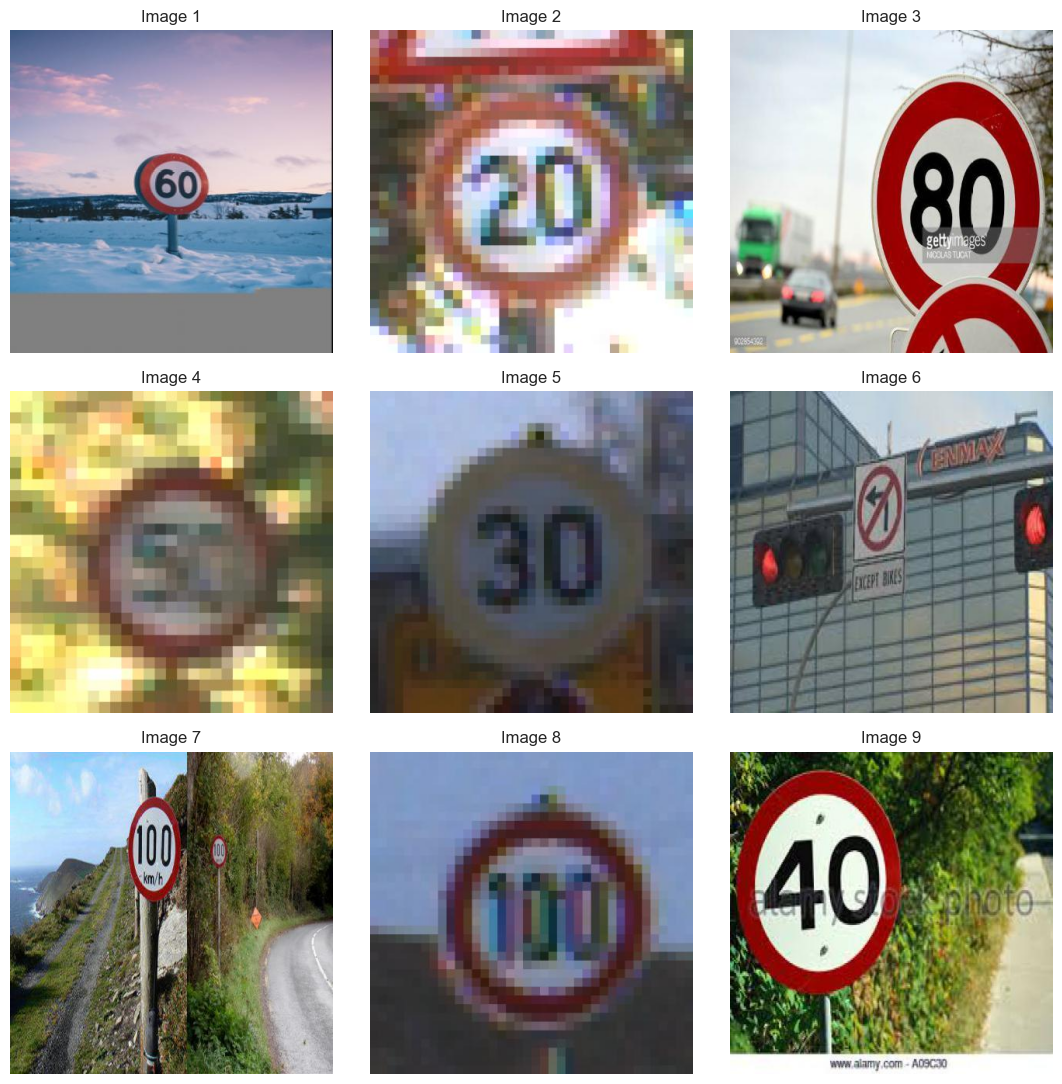

In [6]:
Image_dir = r'D:\car\train\images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Get the size of the image
image = cv2.imread(r"D:\car\train\images\000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


Pre-trained YOLOv8 For Detect Traffic Signs


image 1/1 D:\car\train\images\000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg: 640x640 (no detections), 18.7ms
Speed: 7.8ms preprocess, 18.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


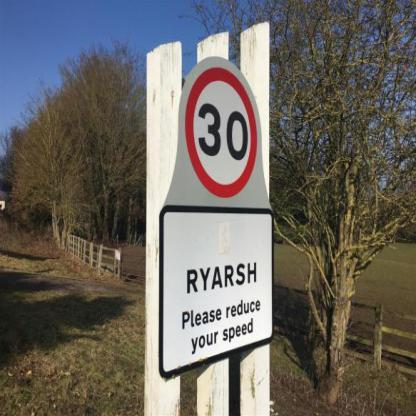

In [9]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = r"D:\car\train\images\000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [12]:
# Build from YAML and transfer weights
from ultralytics import YOLO

Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data=r"D:\car\data.yaml",epochs = 10, batch = -1, optimizer = 'auto')

New https://pypi.org/project/ultralytics/8.3.223 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.221  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:\car\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False

Validation Step

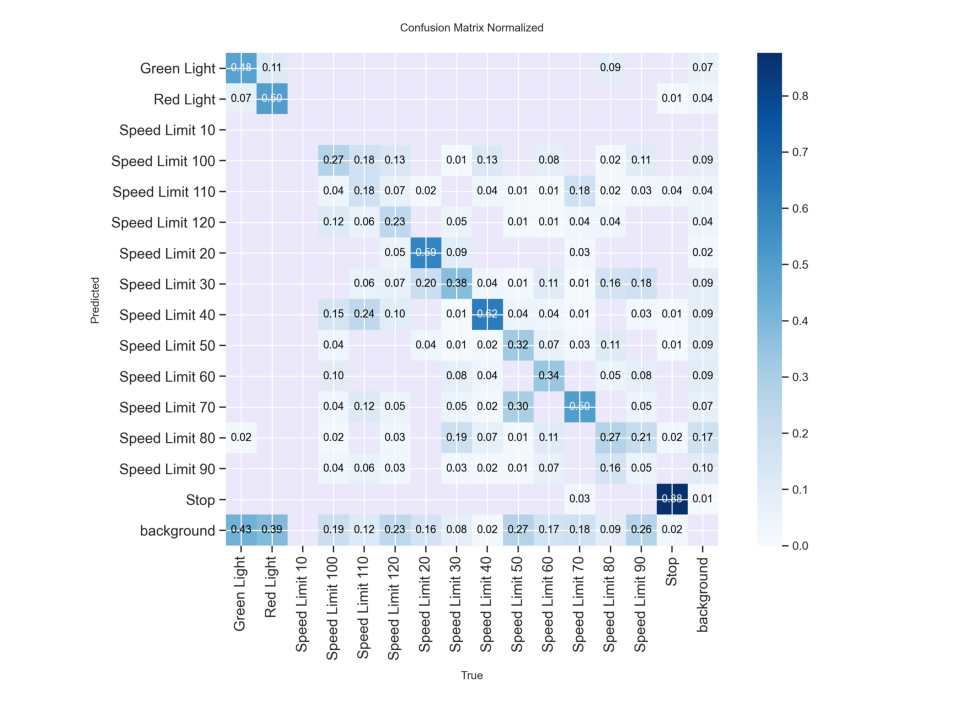

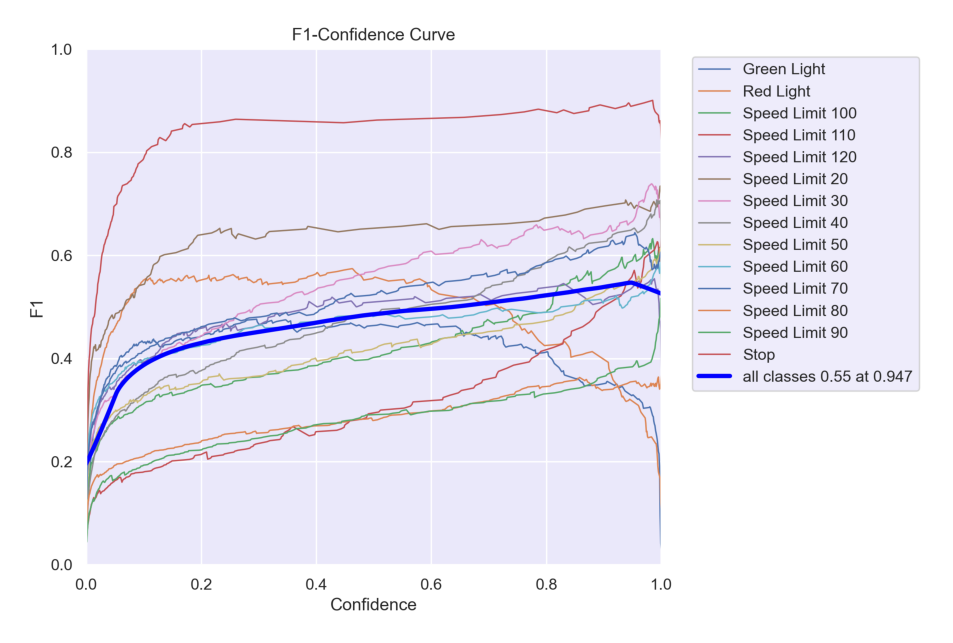

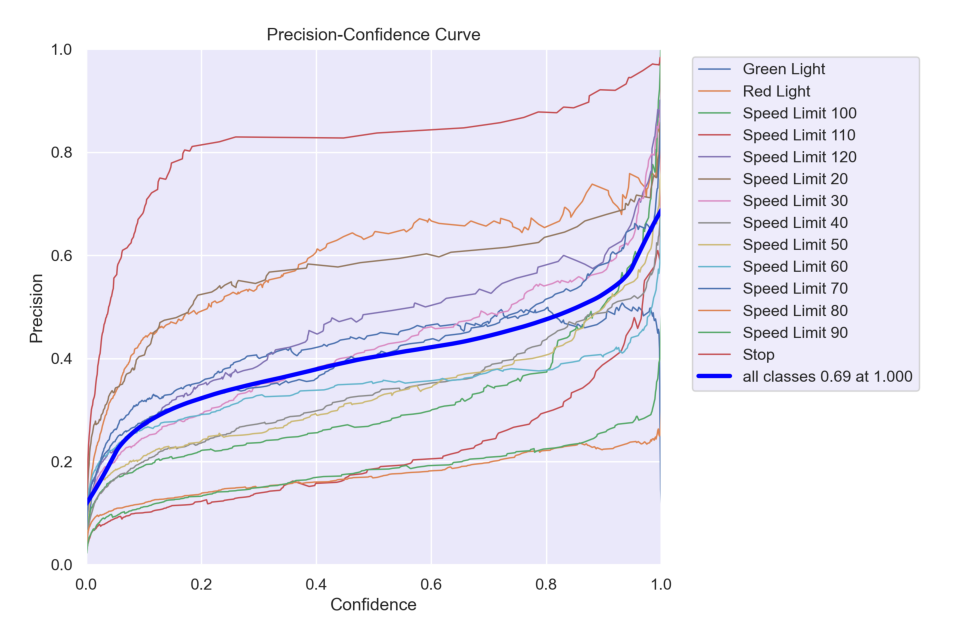

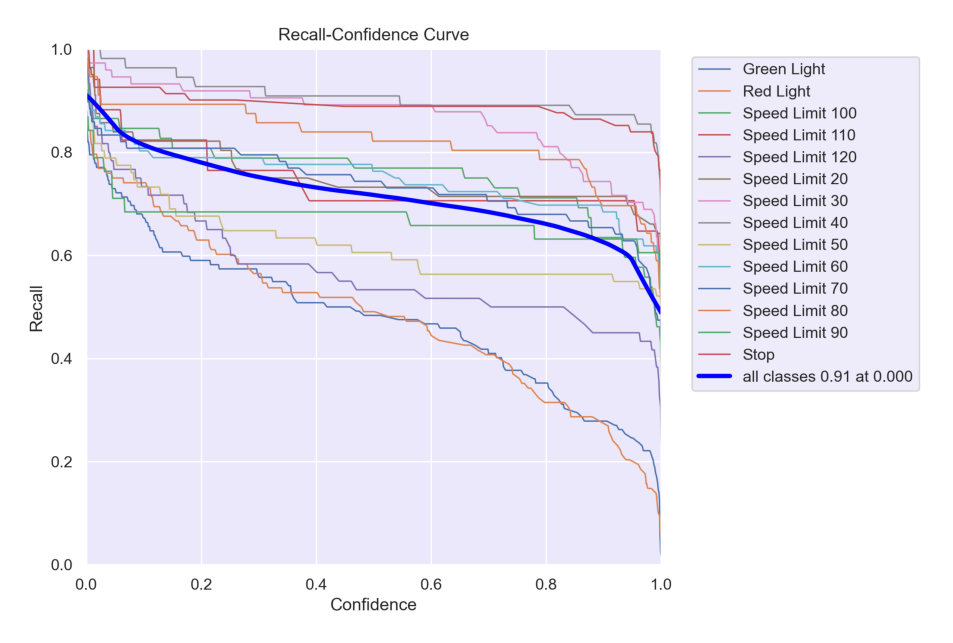

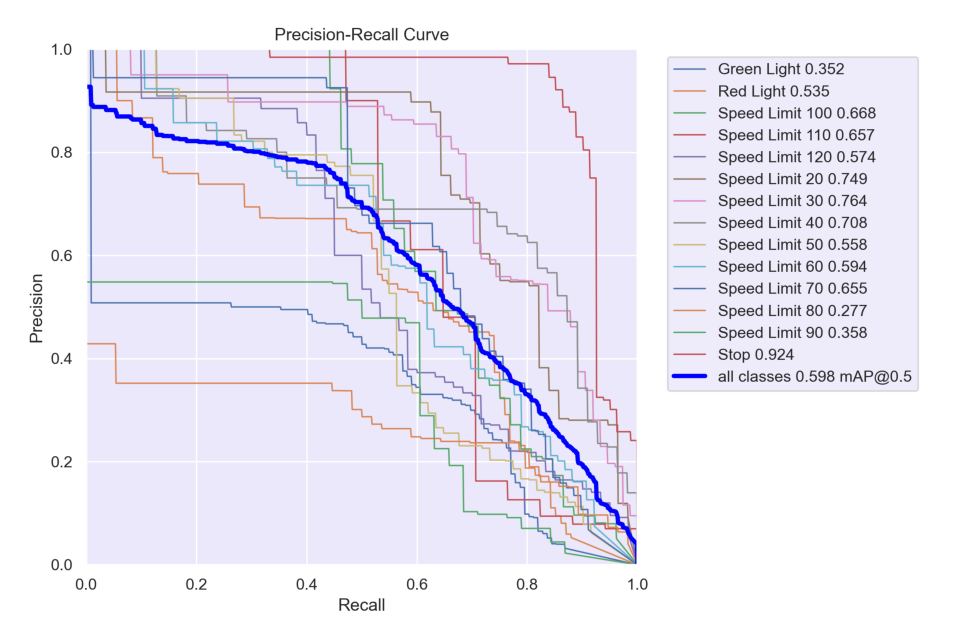

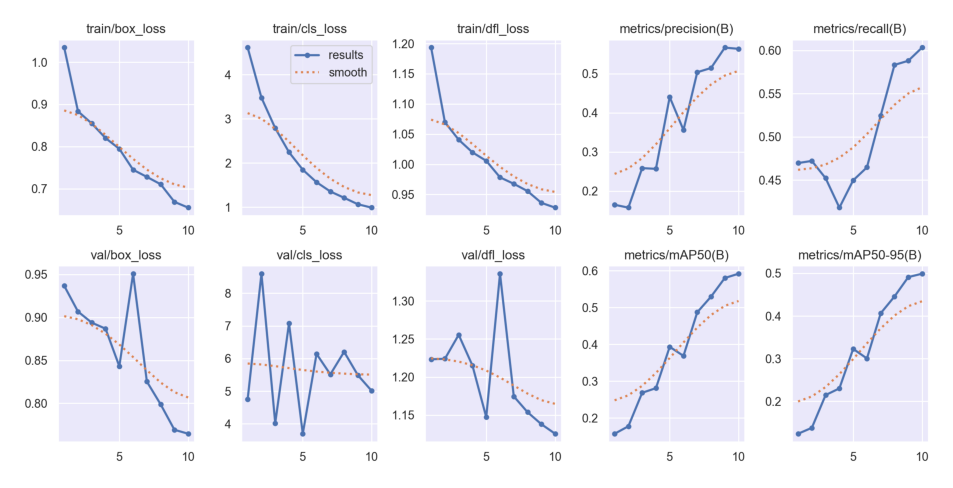

In [16]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'BoxF1_curve.png',
    'BoxP_curve.png',
    'BoxR_curve.png',
    'BoxPR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = r"C:\Users\ASUS\Downloads\runs\detect\train3"

# Display the images
display_images(post_training_files_path, image_files)


In [17]:
Result_Final_model = pd.read_csv(r"C:\Users\ASUS\Downloads\runs\detect\train3\results.csv")
Result_Final_model.tail(10)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   351.803         1.03454         4.61360         1.19330   
1      2   659.193         0.88350         3.47847         1.06969   
2      3  2539.730         0.85455         2.78900         1.04070   
3      4  2844.240         0.81998         2.24390         1.01972   
4      5  3150.750         0.79453         1.84733         1.00574   
5      6  3455.730         0.74490         1.56438         0.97834   
6      7  3869.110         0.72795         1.35442         0.96766   
7      8  4173.570         0.71054         1.21170         0.95550   
8      9  4477.310         0.66878         1.06478         0.93612   
9     10  4782.320         0.65508         0.98858         0.92817   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.16486            0.46959           0.15700   
1               0.15753            0.47209           0.17730   
2               0.25848            0.45206           0.26834   
3               0.25667            0.41797           0.28088   
4               0.44015            0.44958           0.39317   
5               0.35576            0.46463           0.36853   
6               0.50356            0.52471           0.48712   
7               0.51431            0.58328           0.52956   
8               0.56645            0.58804           0.58024   
9               0.56331            0.60331           0.59186   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.12389       0.93672       4.75627       1.22327  0.000175   
1              0.13779       0.90675       8.59826       1.22401  0.000316   
2              0.21459       0.89381       4.02141       1.25550  0.000422   
3              0.23024       0.88684       7.08076       1.21504  0.000370   
4              0.32277       0.84307       3.69593       1.14722  0.000318   
5              0.30036       0.95079       6.14174       1.33585  0.000266   
6              0.40636       0.82530       5.51463       1.17455  0.000214   
7              0.44566       0.79880       6.20576       1.15376  0.000161   
8              0.49109       0.76923       5.48869       1.13798  0.000109   
9              0.49904       0.76462       5.01017       1.12541  0.000057   

     lr/pg1    lr/pg2  
0  0.000175  0.000175  
1  0.000316  0.000316  
2  0.000422  0.000422  
3  0.000370  0.000370  
4  0.000318  0.000318  
5  0.000266  0.000266  
6  0.000214  0.000214  
7  0.000161  0.000161  
8  0.000109  0.000109  
9  0.000057  0.000057

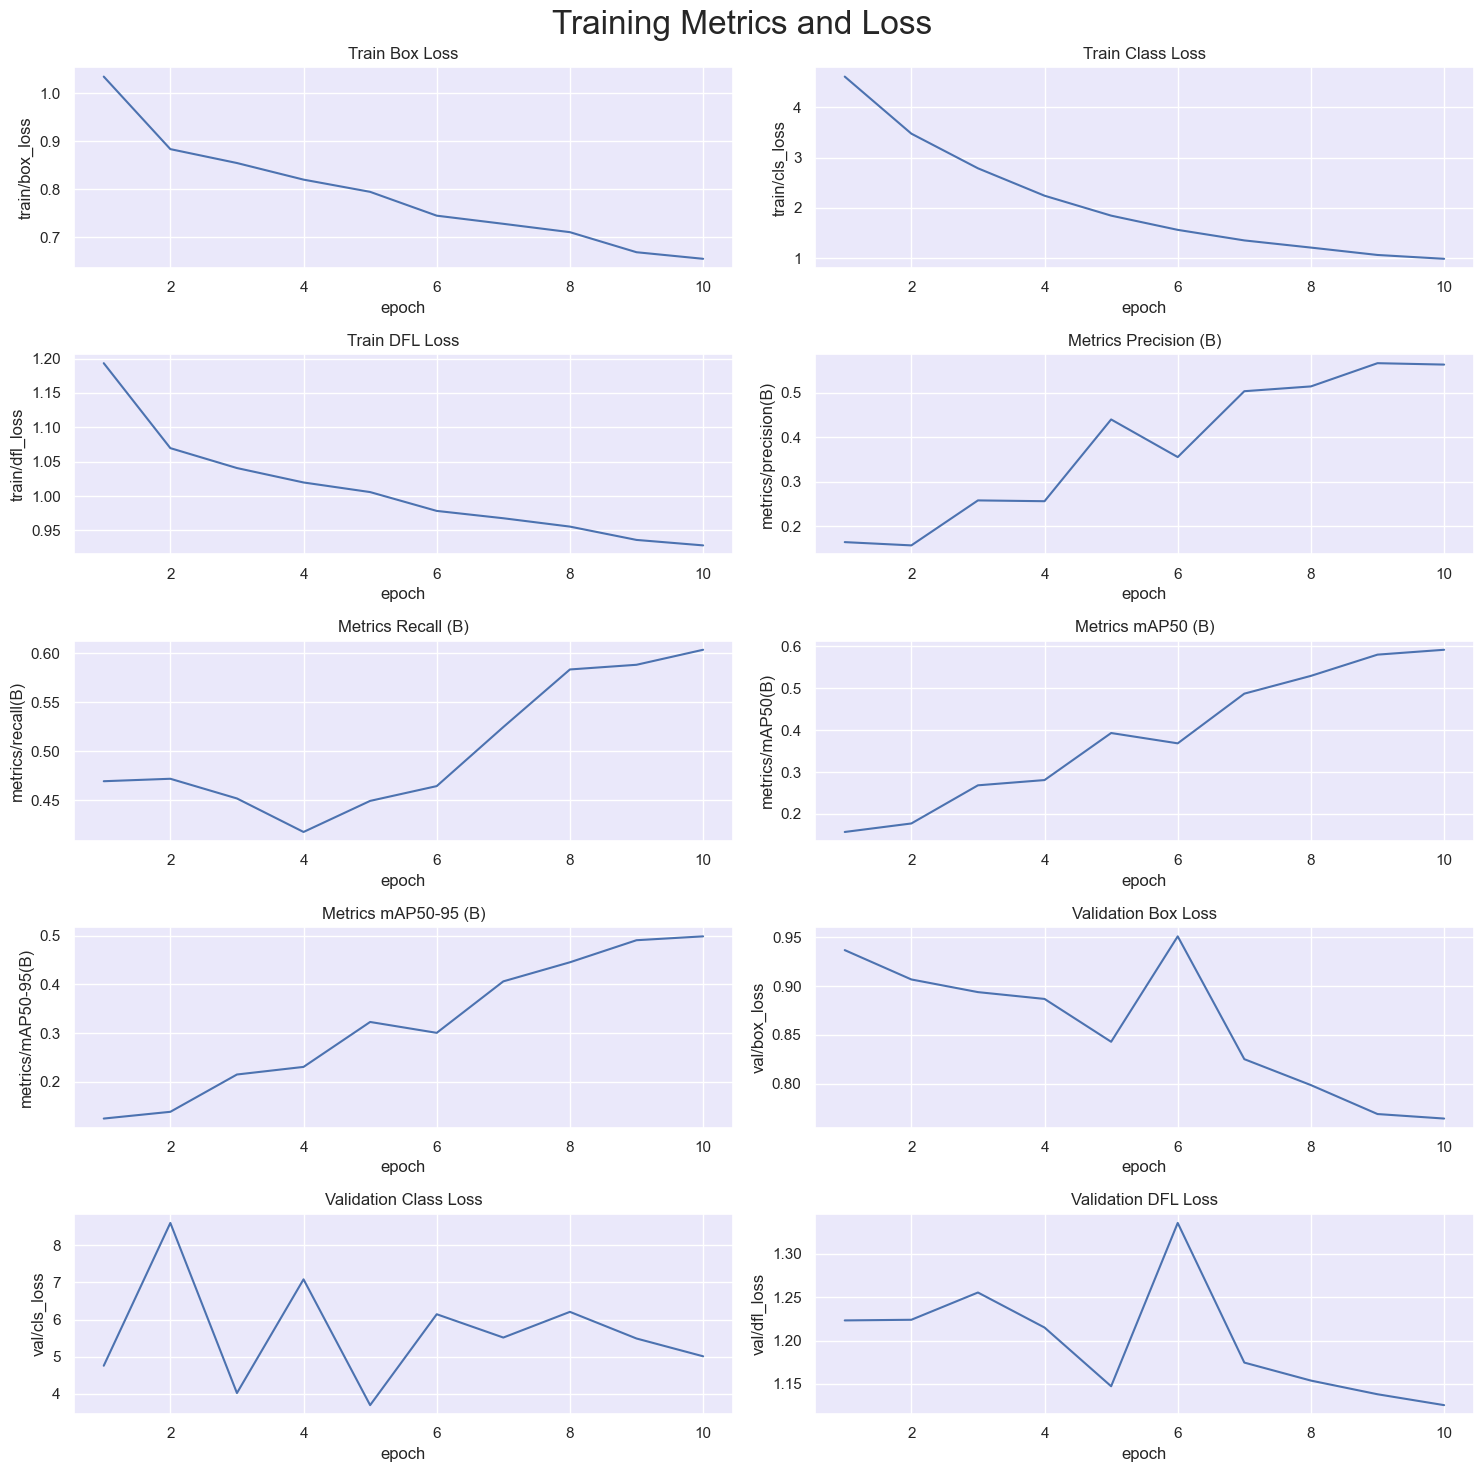

In [18]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

Validation of the Model By TestSet

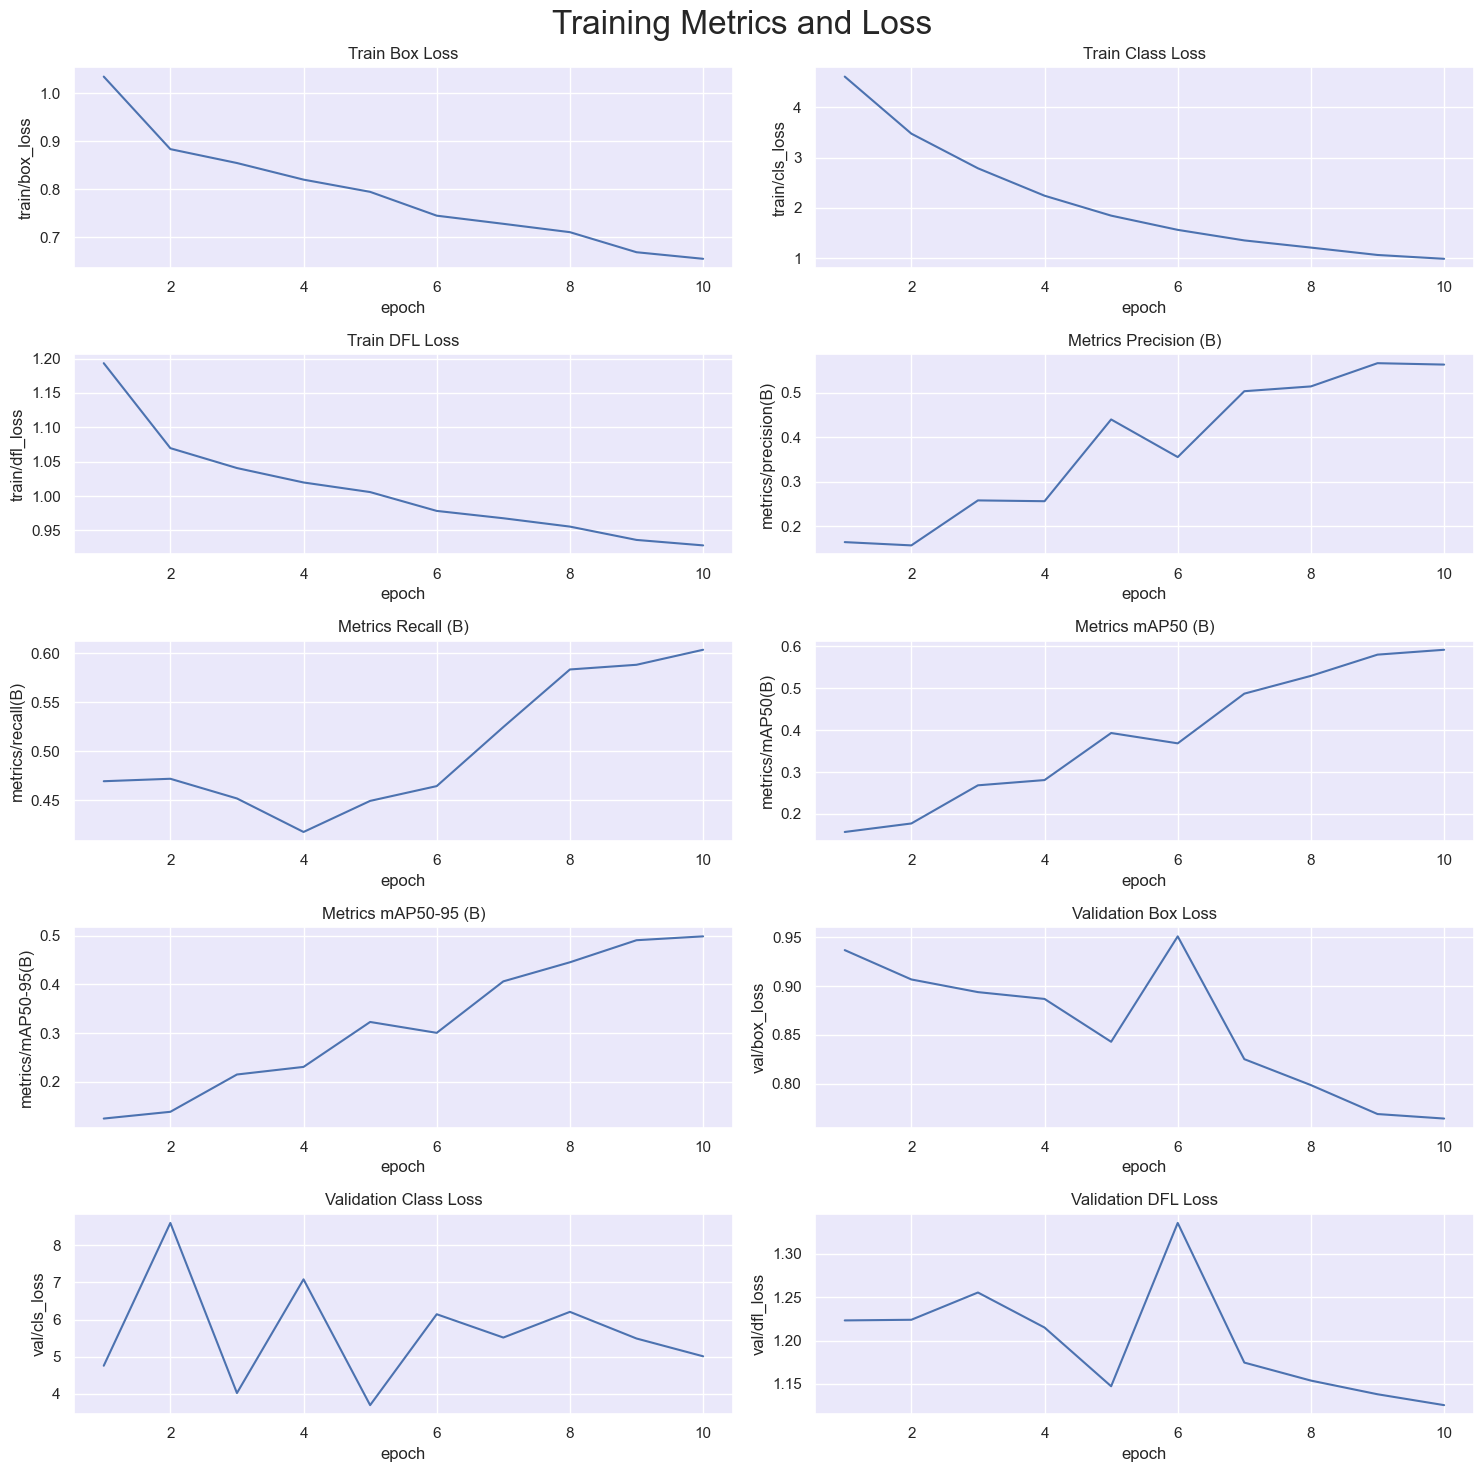

In [19]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [21]:
# Loading the best performing model
Valid_model = YOLO(r"C:\Users\ASUS\Downloads\runs\detect\train3\weights\best.pt")

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.221  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 31.912.8 MB/s, size: 11.2 KB)
val: Scanning D:\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 801/801 764.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 51/51 5.8it/s 8.8s0.1s
                   all        801        944      0.565      0.604      0.625      0.529
           Green Light         87        122       0.51      0.247      0.351      0.192
             Red Light         74        108      0.758      0.203      0.536      0.318
       Speed Limit 100         52         52      0.581      0.596      0.668      0.614
       Speed Limit 110         17         17      0.457      0.706      0.668      0.615
       Speed Limit 120         60   

Making Predictions On Test Images


0: 640x640 1 Speed Limit 30, 1 Speed Limit 60, 58.5ms
Speed: 5.0ms preprocess, 58.5ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 58.1ms
Speed: 4.2ms preprocess, 58.1ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 8.1ms
Speed: 1.6ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Speed Limit 70s, 8.3ms
Speed: 1.1ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 9.8ms
Speed: 1.3ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 8.1ms
Speed: 1.1ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.1ms
Speed: 1.3ms preprocess, 8.1ms infe

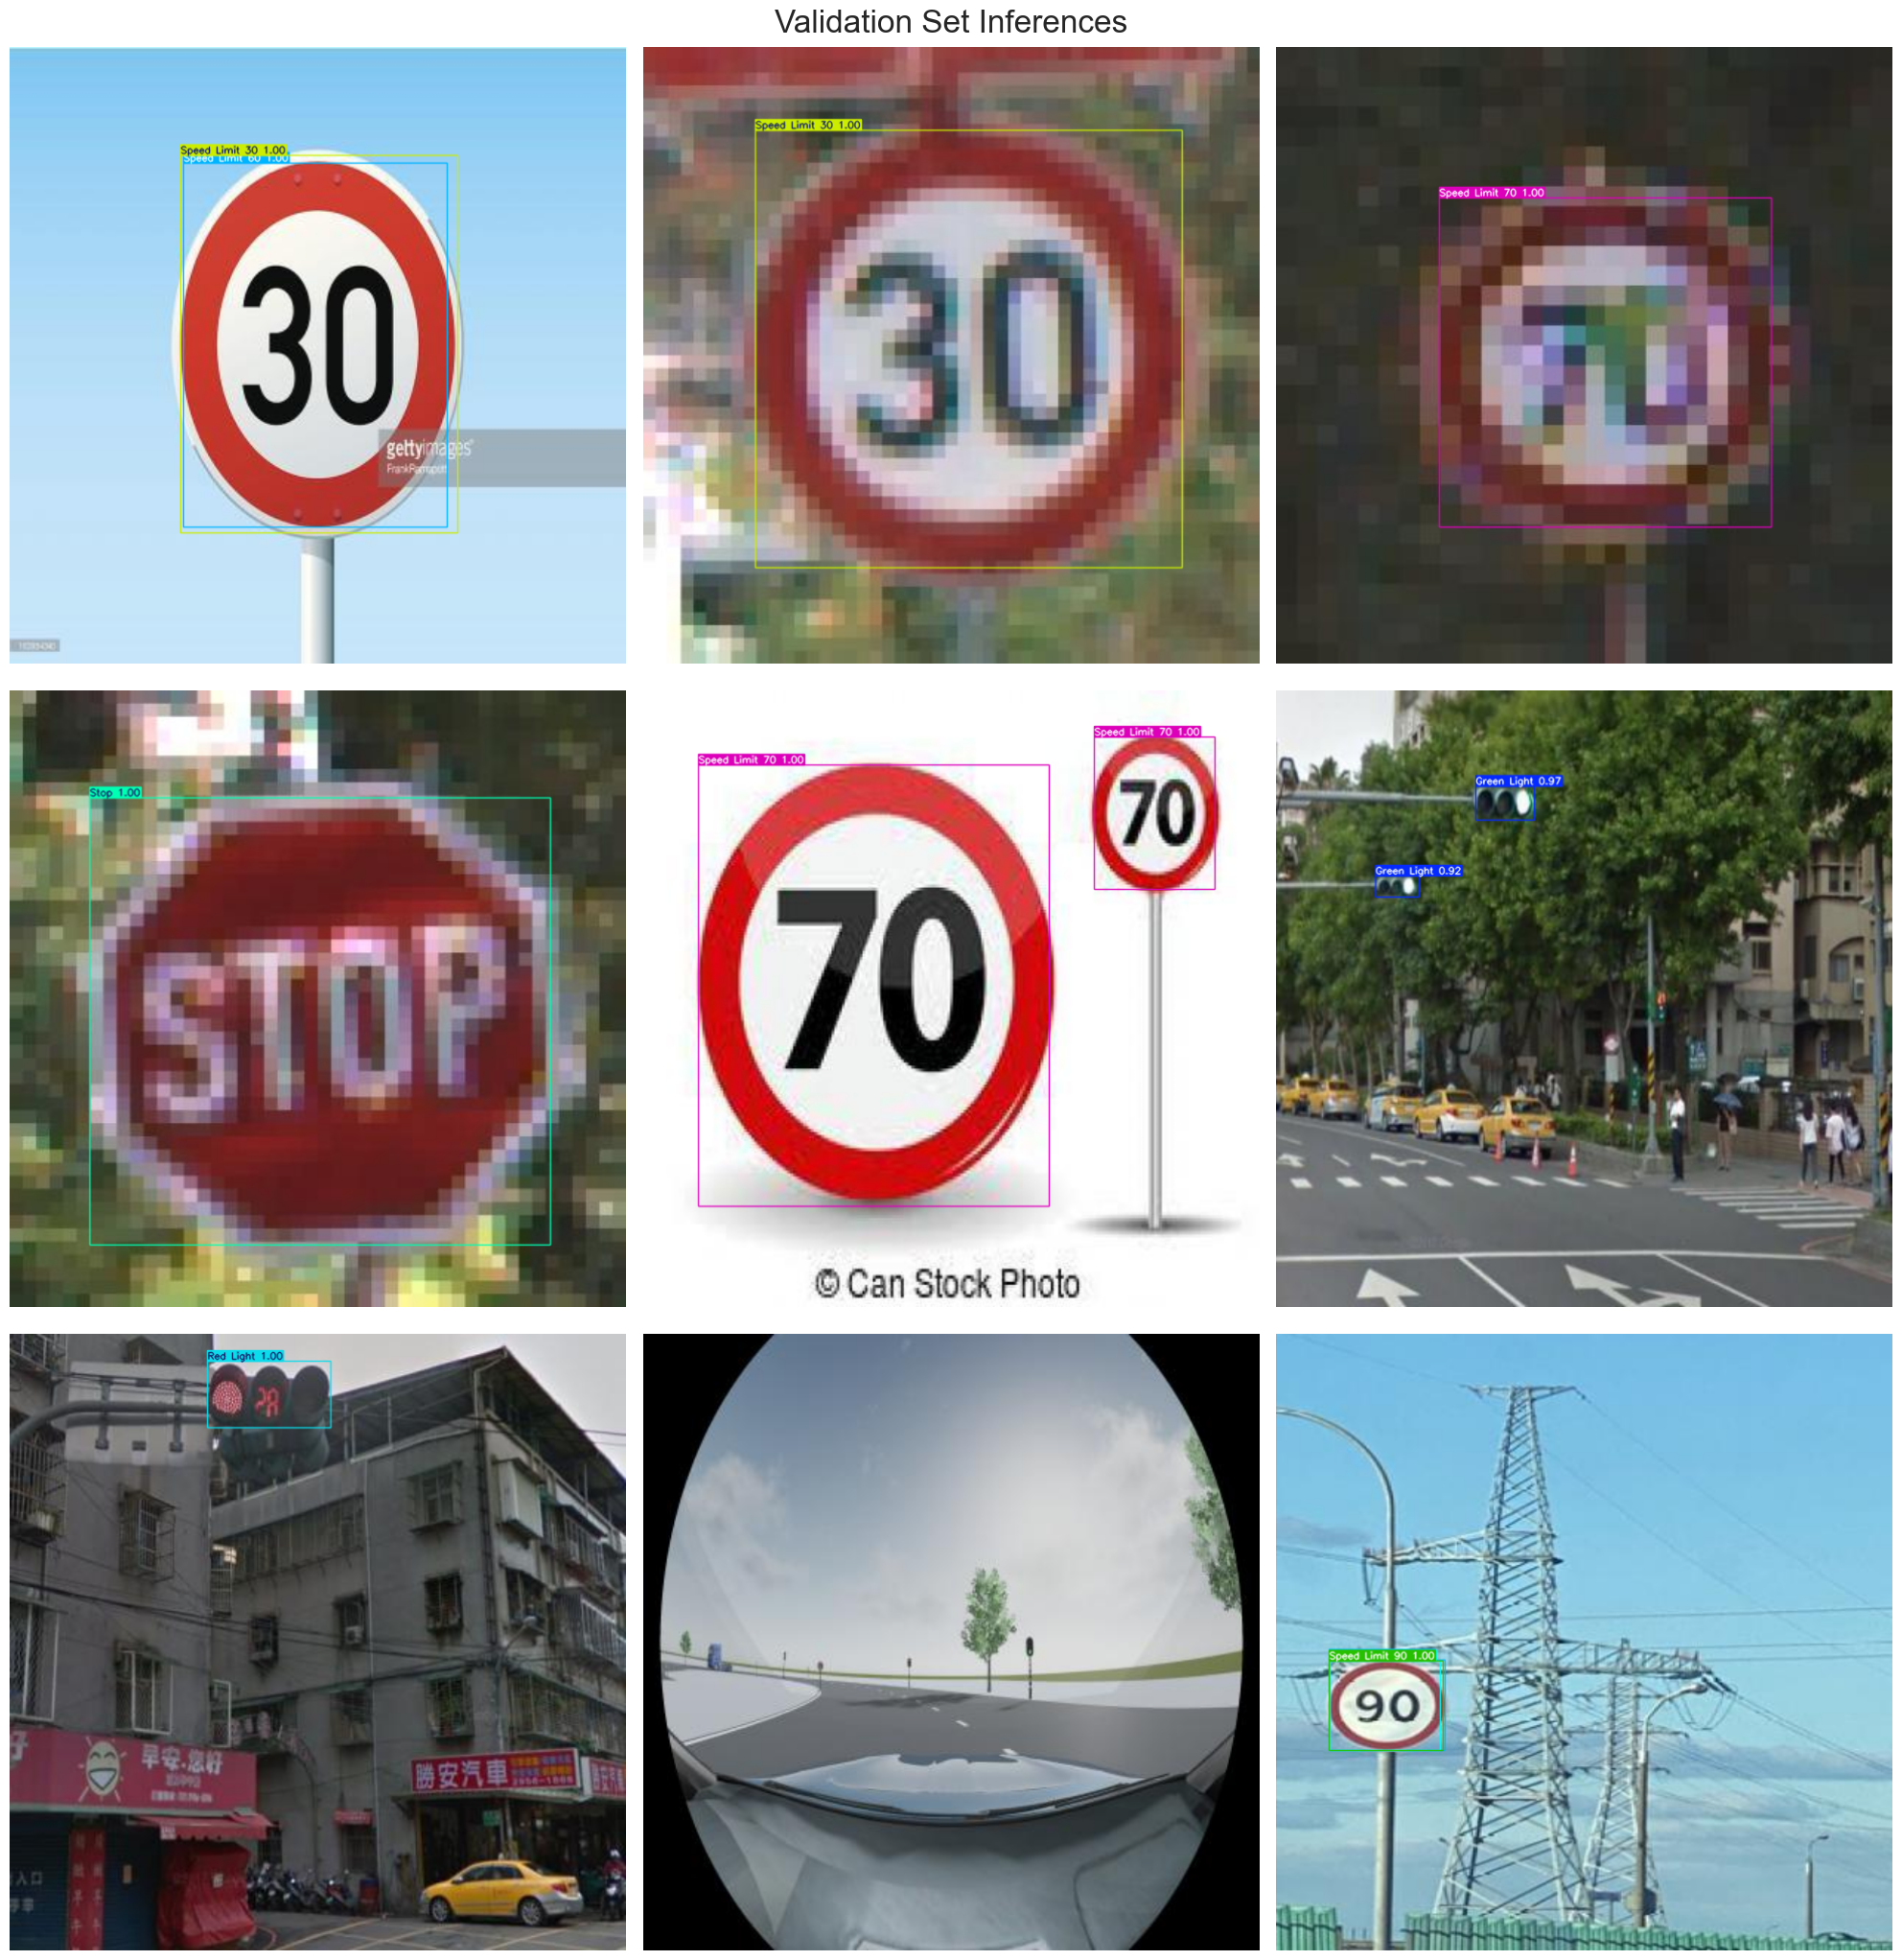

In [22]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = r"D:\car"  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
